In [1]:
import tensorflow as tf
import os
from PIL import Image
import numpy as np
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import cv2
import imutils

In [2]:
def loss_fn(y_true,y_pred):
    return keras.losses.MeanSquaredError()(y_true,y_pred)

In [3]:
IMG_SIZE = 224

In [4]:
model = tf.keras.models.load_model("./model/Localization_Model",custom_objects={'loss_fn': loss_fn})
model.load_weights('./model/Localization_Model_weights.h5')

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 256)       2

In [6]:
cur_dir = os.getcwd()
test_img_dir = os.path.join(cur_dir,'data/CAMERA/1')
test_imgs = [imgname for imgname in os.listdir(test_img_dir) if os.path.splitext(imgname)[-1] == '.jpg']
for img in test_imgs:
    img_path = os.path.join(test_img_dir,img)
    image = Image.open(img_path)
    image_mode = image.mode
    if image_mode != 'RGB':
        print(img, image_mode)
        image = np.asarray(image)
        print(image.shape)
        os.remove(img_path)

test_imgs = [imgname for imgname in os.listdir(test_img_dir) if os.path.splitext(imgname)[-1] == '.jpg']

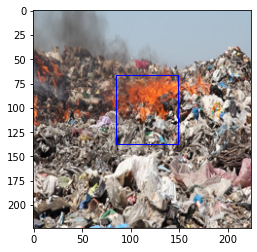

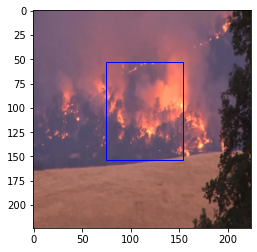

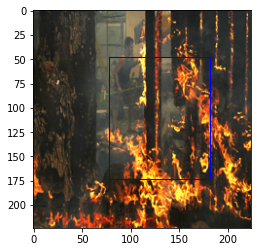

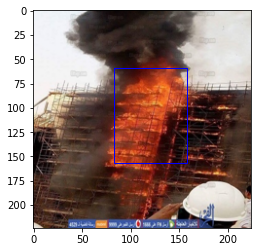

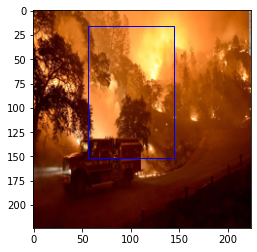

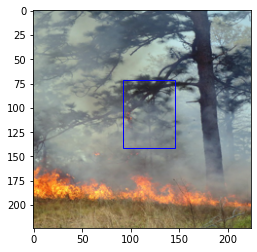

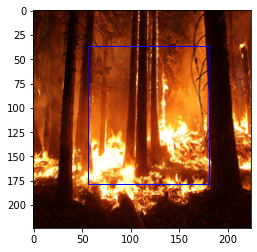

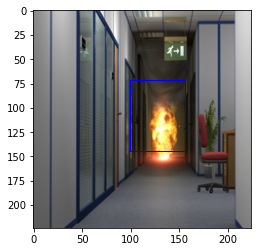

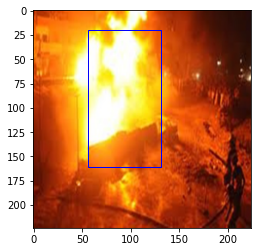

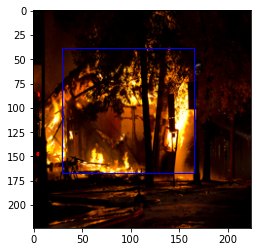

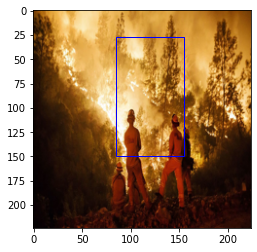

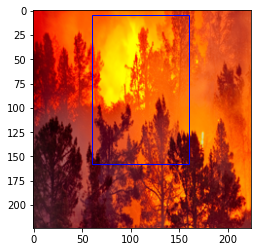

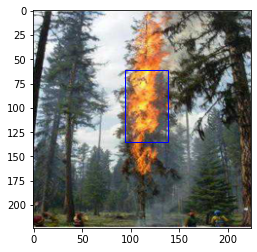

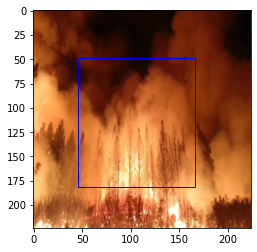

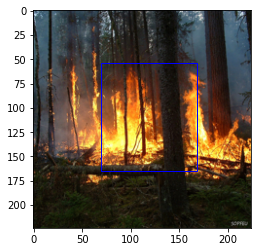

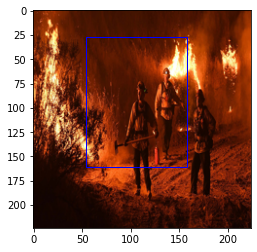

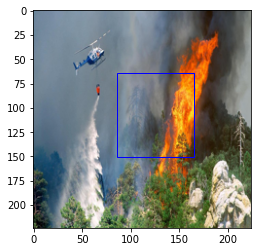

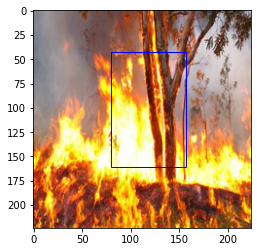

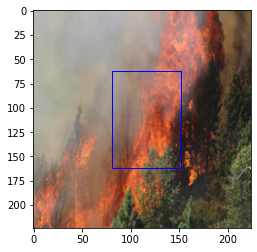

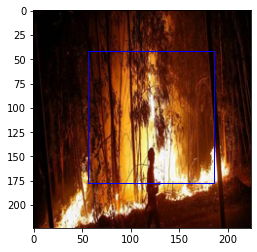

In [10]:
for file in test_imgs[:20]:
    img_path = os.path.join(test_img_dir,file)
    image = Image.open(img_path)
    image = image.resize((IMG_SIZE, IMG_SIZE))
    image = tf.cast(np.array(image), tf.float32)/255.
    image = image[tf.newaxis,...]
    prediction = model.predict(image)
    pred_x = prediction[:,0]
    pred_y = prediction[:,1]
    pred_w = prediction[:,2]
    pred_h = prediction[:,3]
    
    pred_xmin = pred_x - pred_w/2.
    pred_ymin = pred_y - pred_h/2.
    pred_rect_x = int(pred_xmin * IMG_SIZE)
    pred_rect_y = int(pred_ymin * IMG_SIZE)
    pred_rect_w = int(pred_w * IMG_SIZE)
    pred_rect_h = int(pred_h * IMG_SIZE)
    
    pred_rect = Rectangle((pred_rect_x, pred_rect_y),pred_rect_w, pred_rect_h, fill=False, color='blue')
    plt.axes().add_patch(pred_rect)
    
    plt.imshow(image[0])
    plt.show()

In [ ]:
cap = cv2.VideoCapture('./data/video/CCTV/fire and smoke.mp4')
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print(height, width)
while True: 
    if cap.grab():
        ret, frame = cap.retrieve() 
        if ret:
            image = np.array([[[frame[row][col][2-depth] for depth in range(3)] for col in range(width)] for row in range(height)])
            image = Image.fromarray(image)
            image = image.resize((IMG_SIZE, IMG_SIZE))
            image = tf.cast(np.array(image), tf.float32)/255.
            image = image[tf.newaxis,...]
            prediction = model.predict(image)
            
            pred_x = prediction[:,0]
            pred_y = prediction[:,1]
            pred_w = prediction[:,2]
            pred_h = prediction[:,3]
            
            pred_xmin = int((pred_x - pred_w/2.)*cap.get(cv2.CAP_PROP_FRAME_WIDTH))
            pred_ymin = int((pred_y - pred_h/2.)*cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
            pred_xmax = int((pred_x + pred_w/2.)*cap.get(cv2.CAP_PROP_FRAME_WIDTH))
            pred_ymax = int((pred_y + pred_h/2.)*cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

            frame = cv2.rectangle(frame,(pred_xmin,pred_ymin),(pred_xmax,pred_ymax),(0,0,255),3)
            cv2.imshow('video', frame)
            k = cv2.waitKey(1) & 0xFF
            if k == 27:
                cap.release()
                cv2.destroyWindow('video')
                break
            '''
            pred_xmin = pred_x - pred_w/2.
            pred_ymin = pred_y - pred_h/2.
    
            pred_rect_x = int(pred_xmin * IMG_SIZE)
            pred_rect_y = int(pred_ymin * IMG_SIZE)
            pred_rect_w = int(pred_w * IMG_SIZE)
            pred_rect_h = int(pred_h * IMG_SIZE)
            pred_rect = Rectangle((pred_rect_x, pred_rect_y),pred_rect_w, pred_rect_h, fill=False, color='blue')
            plt.axes().add_patch(pred_rect)
    
            plt.imshow(image[0])
            plt.show()
            '''
        else:
            print('error')


360 640
